In [82]:
# Indlæs libaries som typisk bruges til data visualisering
# Importer numpy, matplotlib, pandas og seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

In [83]:
# Indlæs data fra csv fil
data = pd.read_csv("DailyDelhiClimateTest.csv")
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


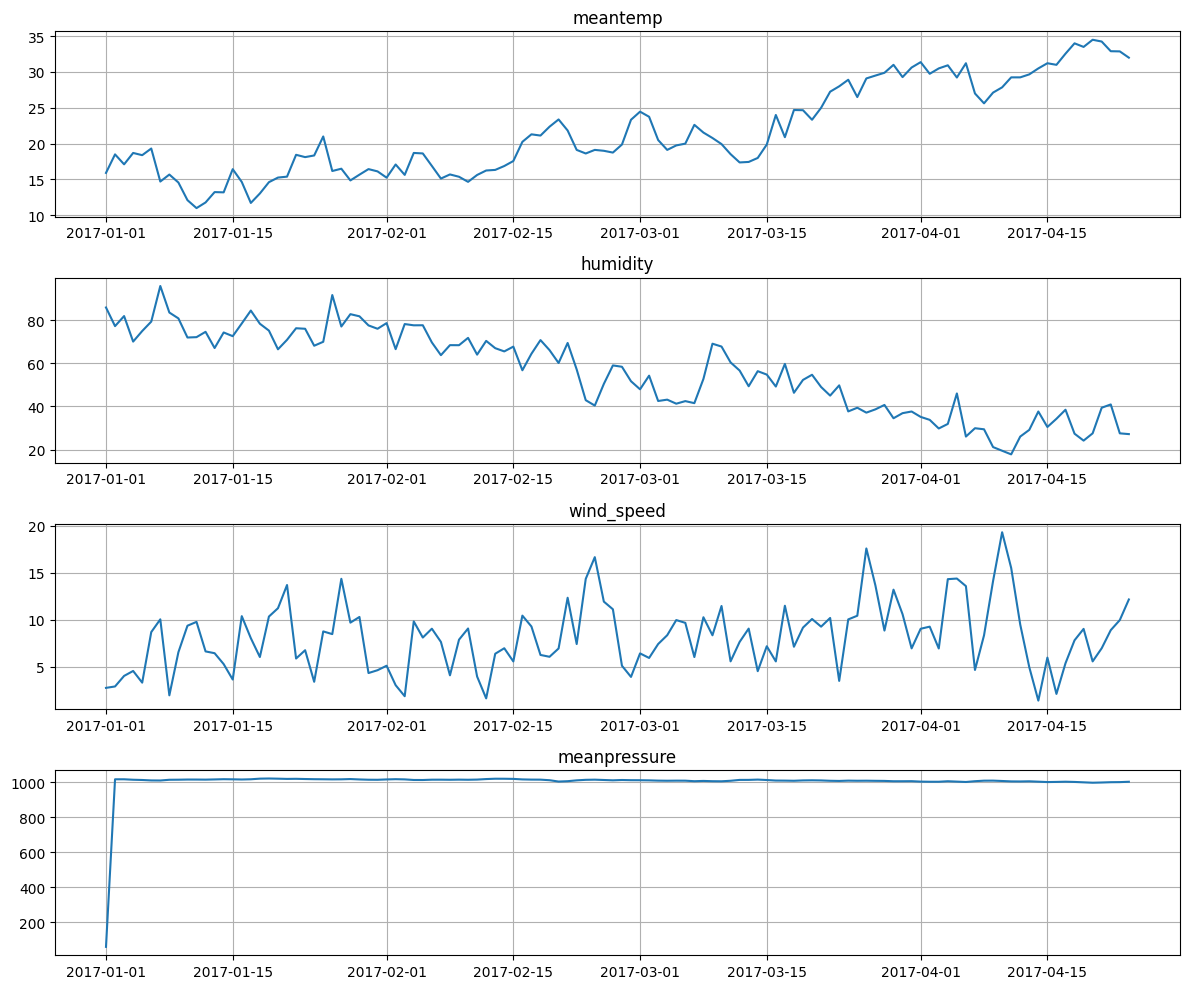

In [84]:
# Vi har altså 5 kolonner i vores datasæt
# Datoen, Temperatur i mean, fugtighed, vindhastighed og et mean tryk
# Vi skal visualisere data på forskellige måder, for at finde støj.

#Først plotter vi dataen for at se hvordan den ser ud i henhold til tiden
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


# Plot alle kolonner i ét plot pr. kolonne
plt.figure(figsize=(12, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[col], label=col)
    plt.title(col)
    plt.grid(True)
    plt.tight_layout()

plt.show()


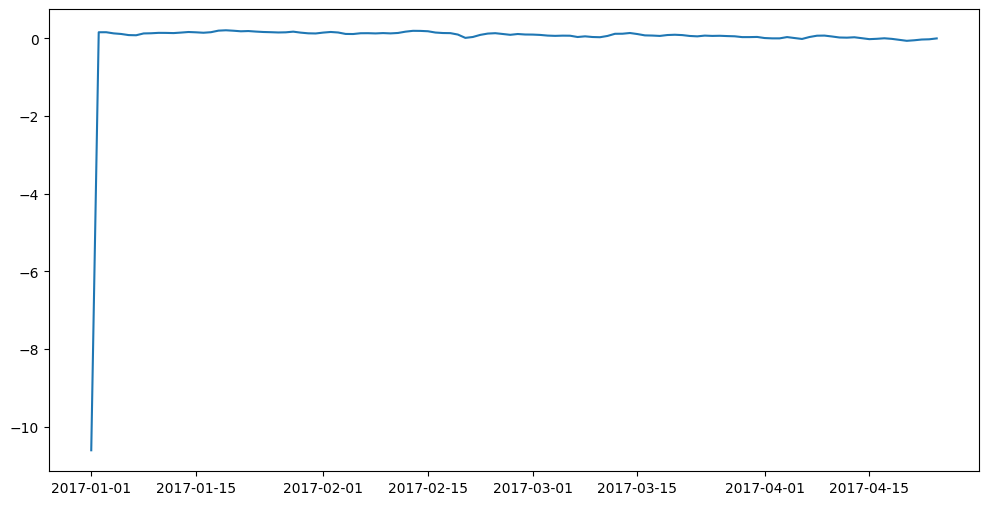

In [85]:
# Der er en tydelig outlier i meanpressure, som vi skal have slettet, den er langt væk fra de andre værdier
# Vi kan bruge zscore til at finde og visualisere outliers
data['zscore'] = zscore(data['meanpressure'])
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['zscore'], label='zscore')

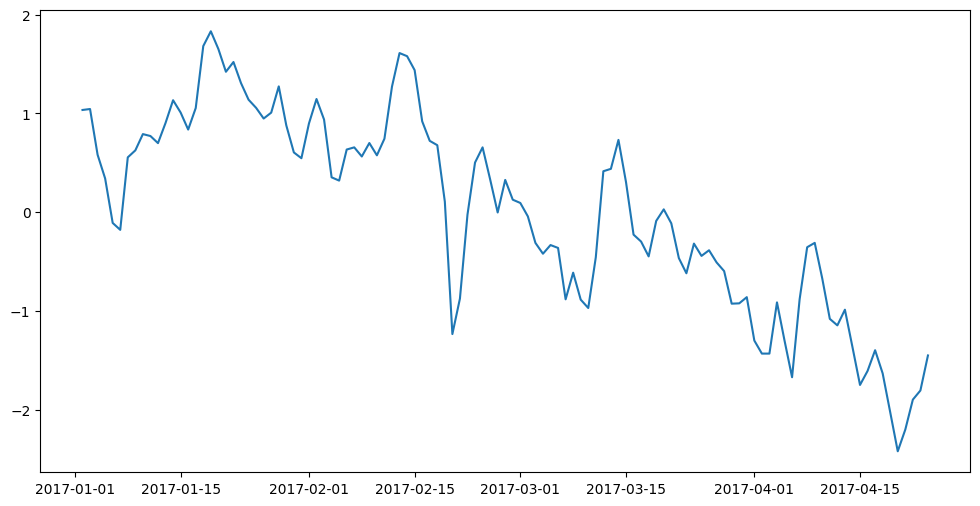

In [86]:
# Vi kan se at der er en outlier i meanpressure, som vi skal have slettet
# Vi kan bruge zscore til at fjerne outliers
data = data[data['zscore'].between(-2, 2)]


data['zscore'] = zscore(data['meanpressure'])
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['zscore'], label='zscore')

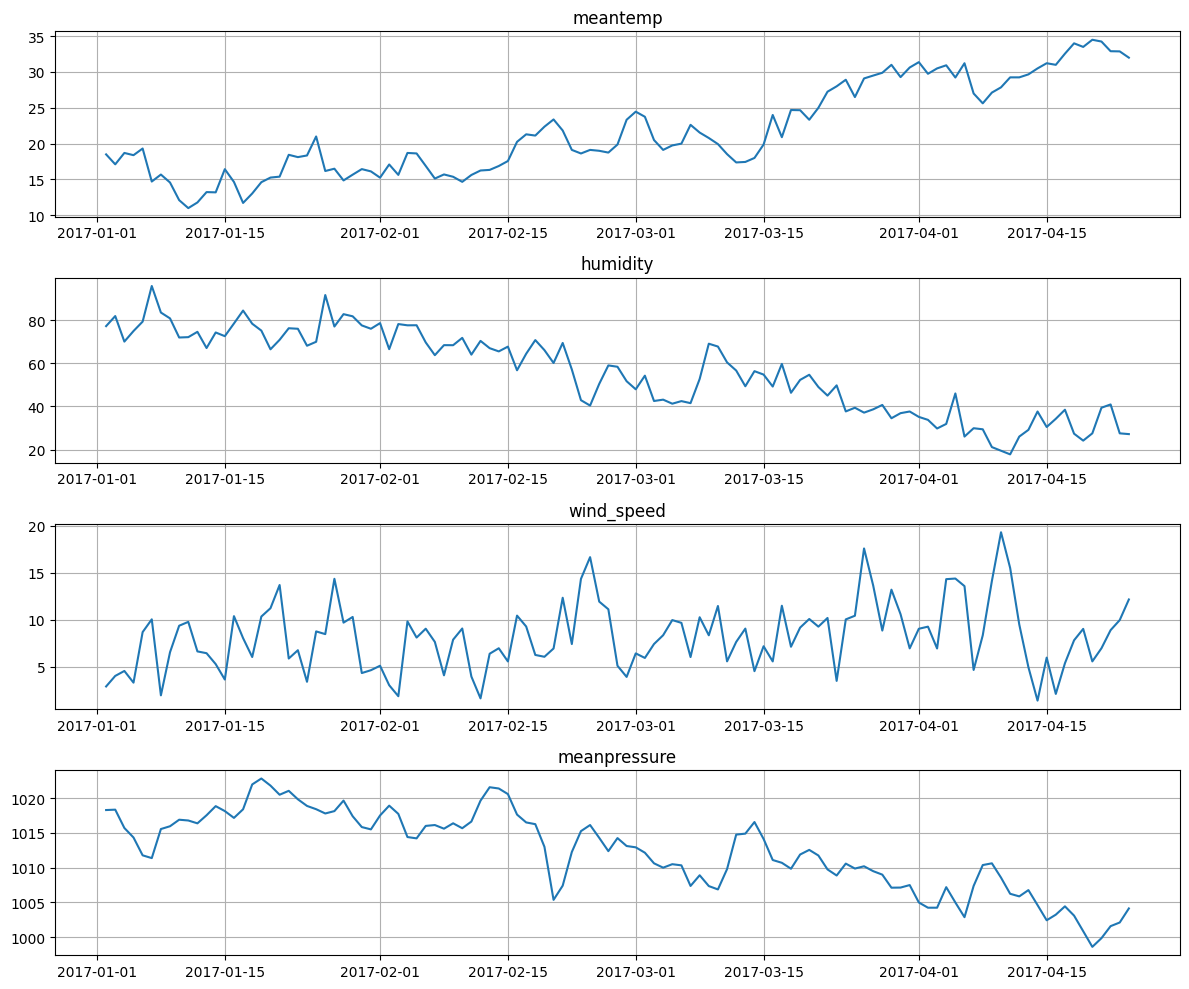

In [87]:
# Vi visualiserer dataen igen, for at se om det har hjulpet
plt.figure(figsize=(12, 10))
for i, col in enumerate(data.columns[:-1], 1):  # Undgå at inkludere 'zscore' kolonnen
    plt.subplot(len(data.columns[:-1]), 1, i)
    plt.plot(data.index, data[col], label=col)
    plt.title(col)
    plt.grid(True)
    plt.tight_layout()

plt.show()

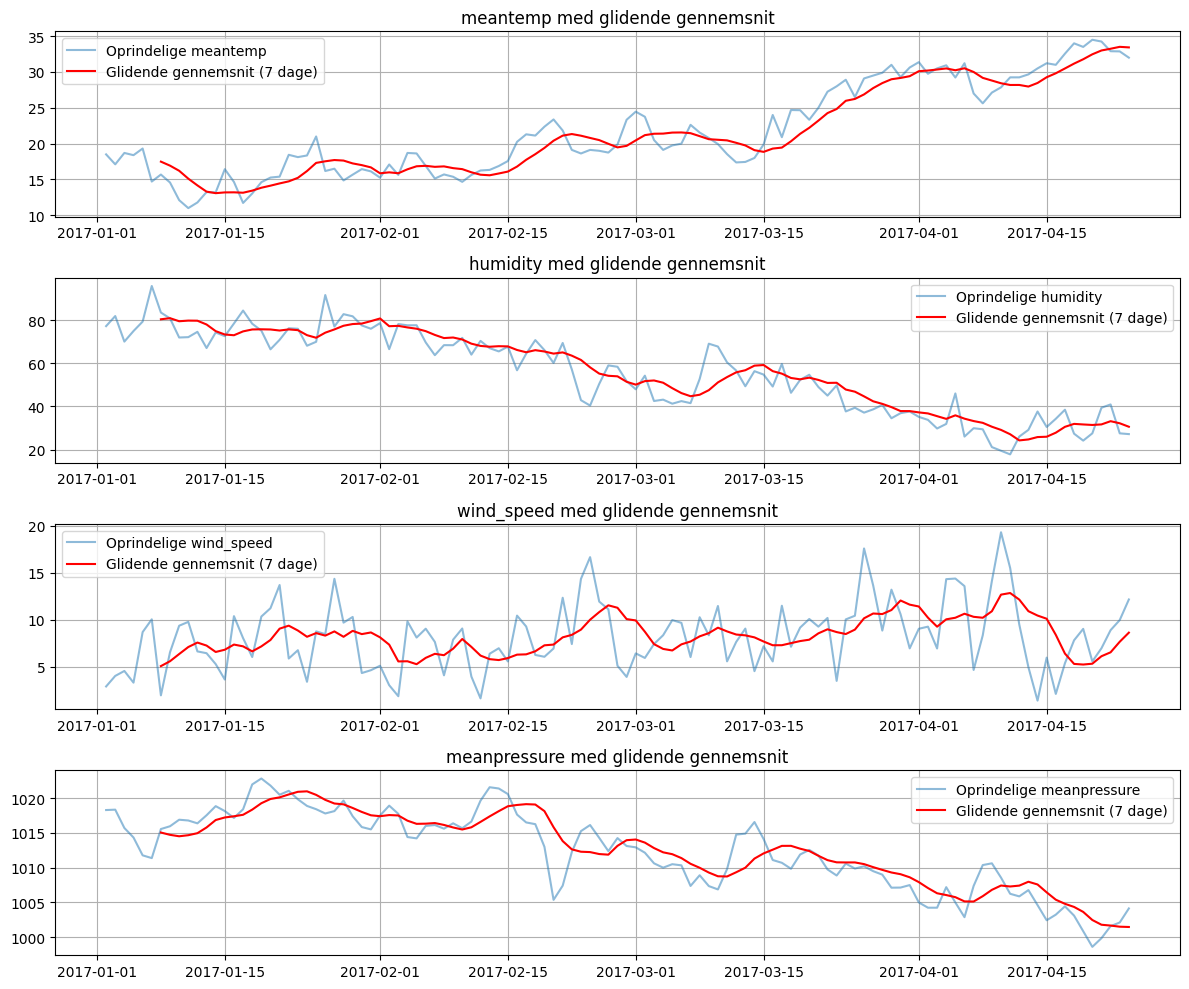

In [88]:
# Vi prøver at visualisere dataen gennem et gennemsnit af syv dage, for at finde tendenser i dataen, og for at se, om der findes større afvigelser. 

# Beregn glidende gennemsnit for hver kolonne
window_size = 7  # Glidende gennemsnit over 7 dage
smoothed_data = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].rolling(window=window_size).mean()

# Visualiser de oprindelige data og glidende gennemsnit
plt.figure(figsize=(12, 10))
for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 1):
    plt.subplot(4, 1, i)
    plt.plot(data.index, data[col], label=f'Oprindelige {col}', alpha=0.5)
    plt.plot(smoothed_data.index, smoothed_data[col], label=f'Glidende gennemsnit ({window_size} dage)', color='red')
    plt.title(f'{col} med glidende gennemsnit')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

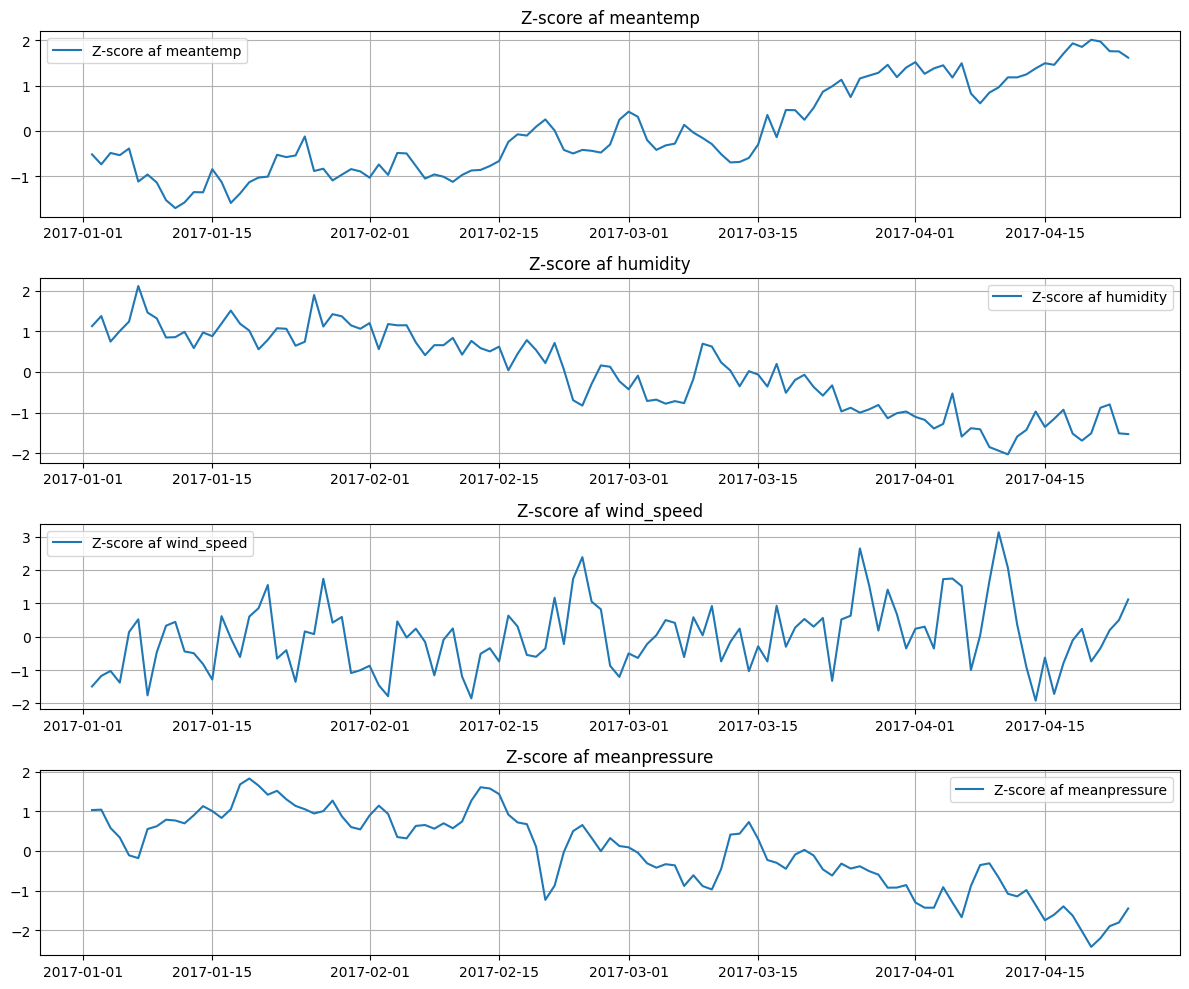

In [89]:
# Det virker stadig svært at finde ud af, om det er større outliers. Så vi vender tilbage til Z-scores
# Visualiser z-scores for alle kolonner
plt.figure(figsize=(12, 10))
for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 1):
    plt.subplot(4, 1, i)
    plt.plot(data.index, zscore(data[col]), label=f'Z-score af {col}')
    plt.title(f'Z-score af {col}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

plt.show()

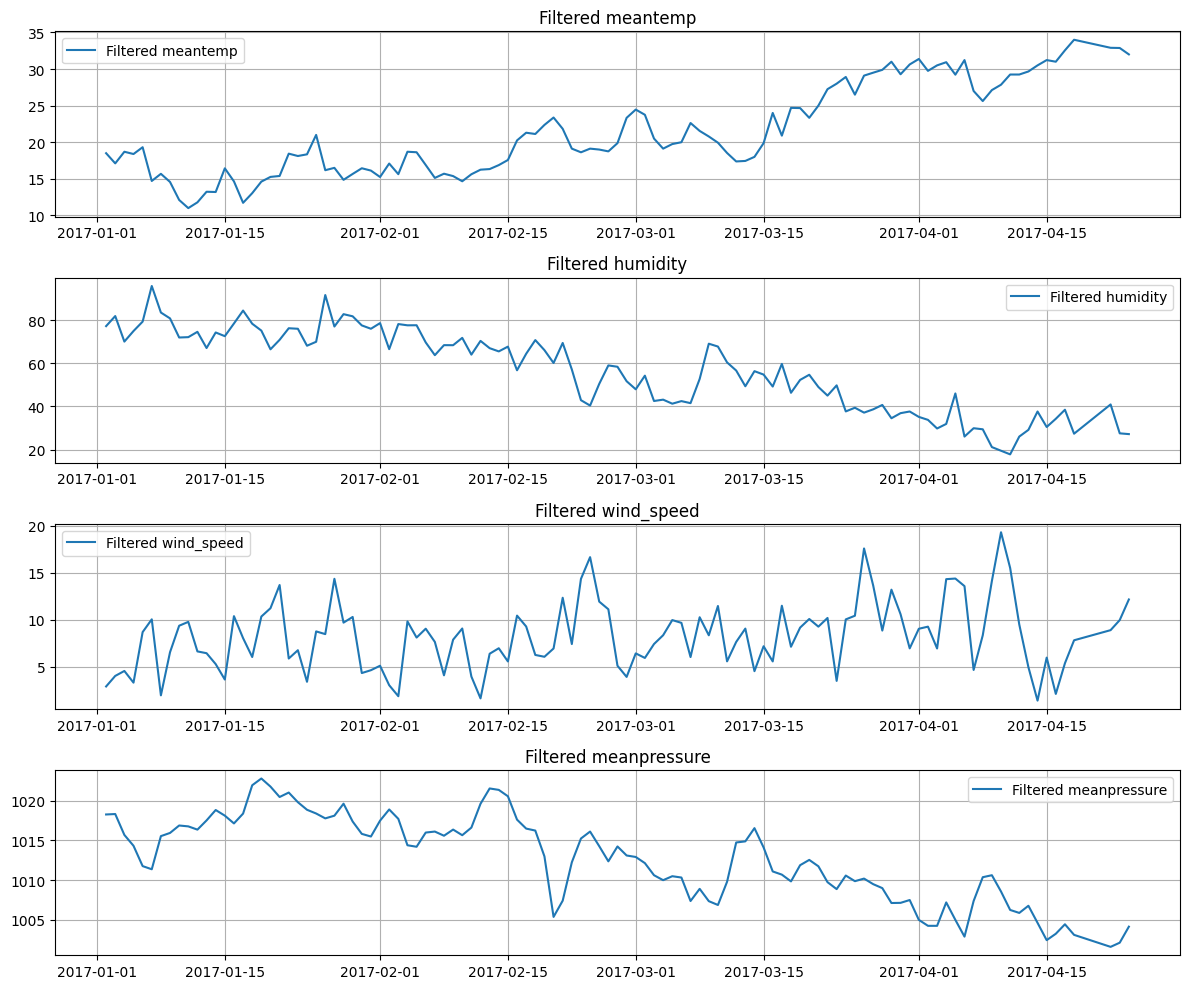

In [90]:
# Umiddelbart ser det ud til at meanpressure og humidity samt meantemp har lineære afhængigheder. Vi prøver at fjerne outliers for alle z-scores i henhold til 2 og -2 også plotter vi igen, og ser efter lineær afhængighed. 

# Fjern outliers baseret på z-scores mellem -2 og 2
filtered_data = data[(data['zscore'] >= -2) & (data['zscore'] <= 2)]

# Plot de nye data
plt.figure(figsize=(12, 10))
for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 1):
    plt.subplot(4, 1, i)
    plt.plot(filtered_data.index, filtered_data[col], label=f'Filtered {col}')
    plt.title(f'Filtered {col}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

plt.show()

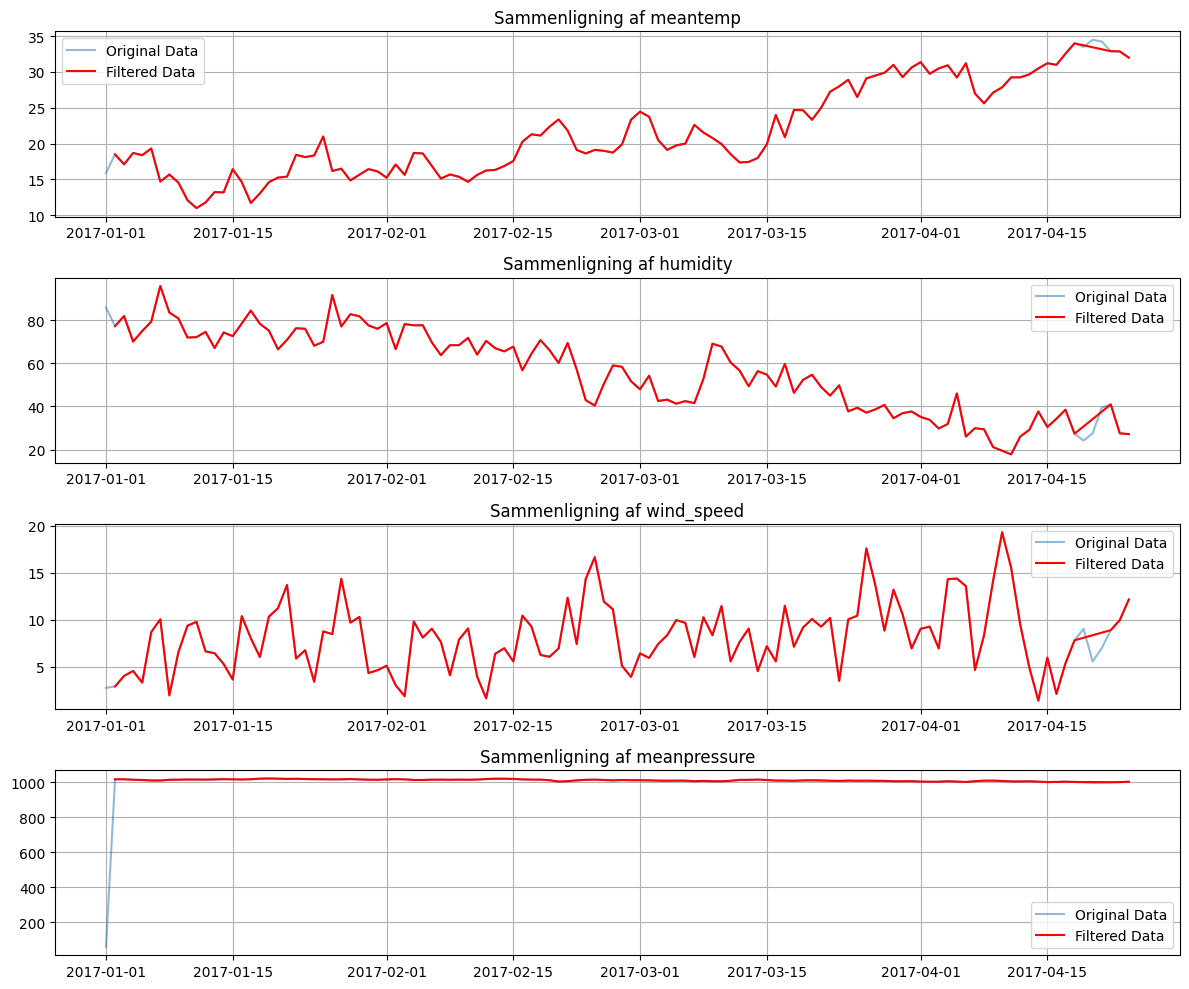

In [ ]:
#Nu ser vi, om vores ændring af outliers har hjulpet. Vi sammenligner original data med filtered data

# Indlæs datasættet igen
original_data = pd.read_csv("DailyDelhiClimateTest.csv")
original_data['date'] = pd.to_datetime(original_data['date'])
original_data.set_index('date', inplace=True)

# Visualiser sammenligningen mellem original data og filtered data
plt.figure(figsize=(12, 10))
for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 1):
    plt.subplot(4, 1, i)
    plt.plot(original_data.index, original_data[col], label='Original Data', alpha=0.5)
    plt.plot(filtered_data.index, filtered_data[col], label='Filtered Data', color='red')
    plt.title(f'Sammenligning af {col}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

In [ ]:
# Der har af min mening ikke været så meget støj i datasættet, det ser mest ud til, at det har været få outliers vi har fjernet. Dog fandt vi den større outlier i meanpressure, som kunne skyldes fejl i sensorer. 